In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [16]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [34]:
from sklearn.preprocessing import LabelEncoder

target = data['diabetes']
categorical_columns = ['gender', 'smoking_history']

label_encoder = LabelEncoder()

# Iterate through each categorical column and encode it
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

features = data.drop('diabetes', axis=1)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Replace the original features with the normalized ones
data[features.columns] = normalized_features

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [35]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [36]:
from sklearn import metrics

print("accuracy:", metrics. accuracy_score(y_test, y_pred))

accuracy: 0.9059666666666667


In [37]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9059666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95     27453
           1       0.46      0.65      0.54      2547

    accuracy                           0.91     30000
   macro avg       0.71      0.79      0.74     30000
weighted avg       0.92      0.91      0.91     30000



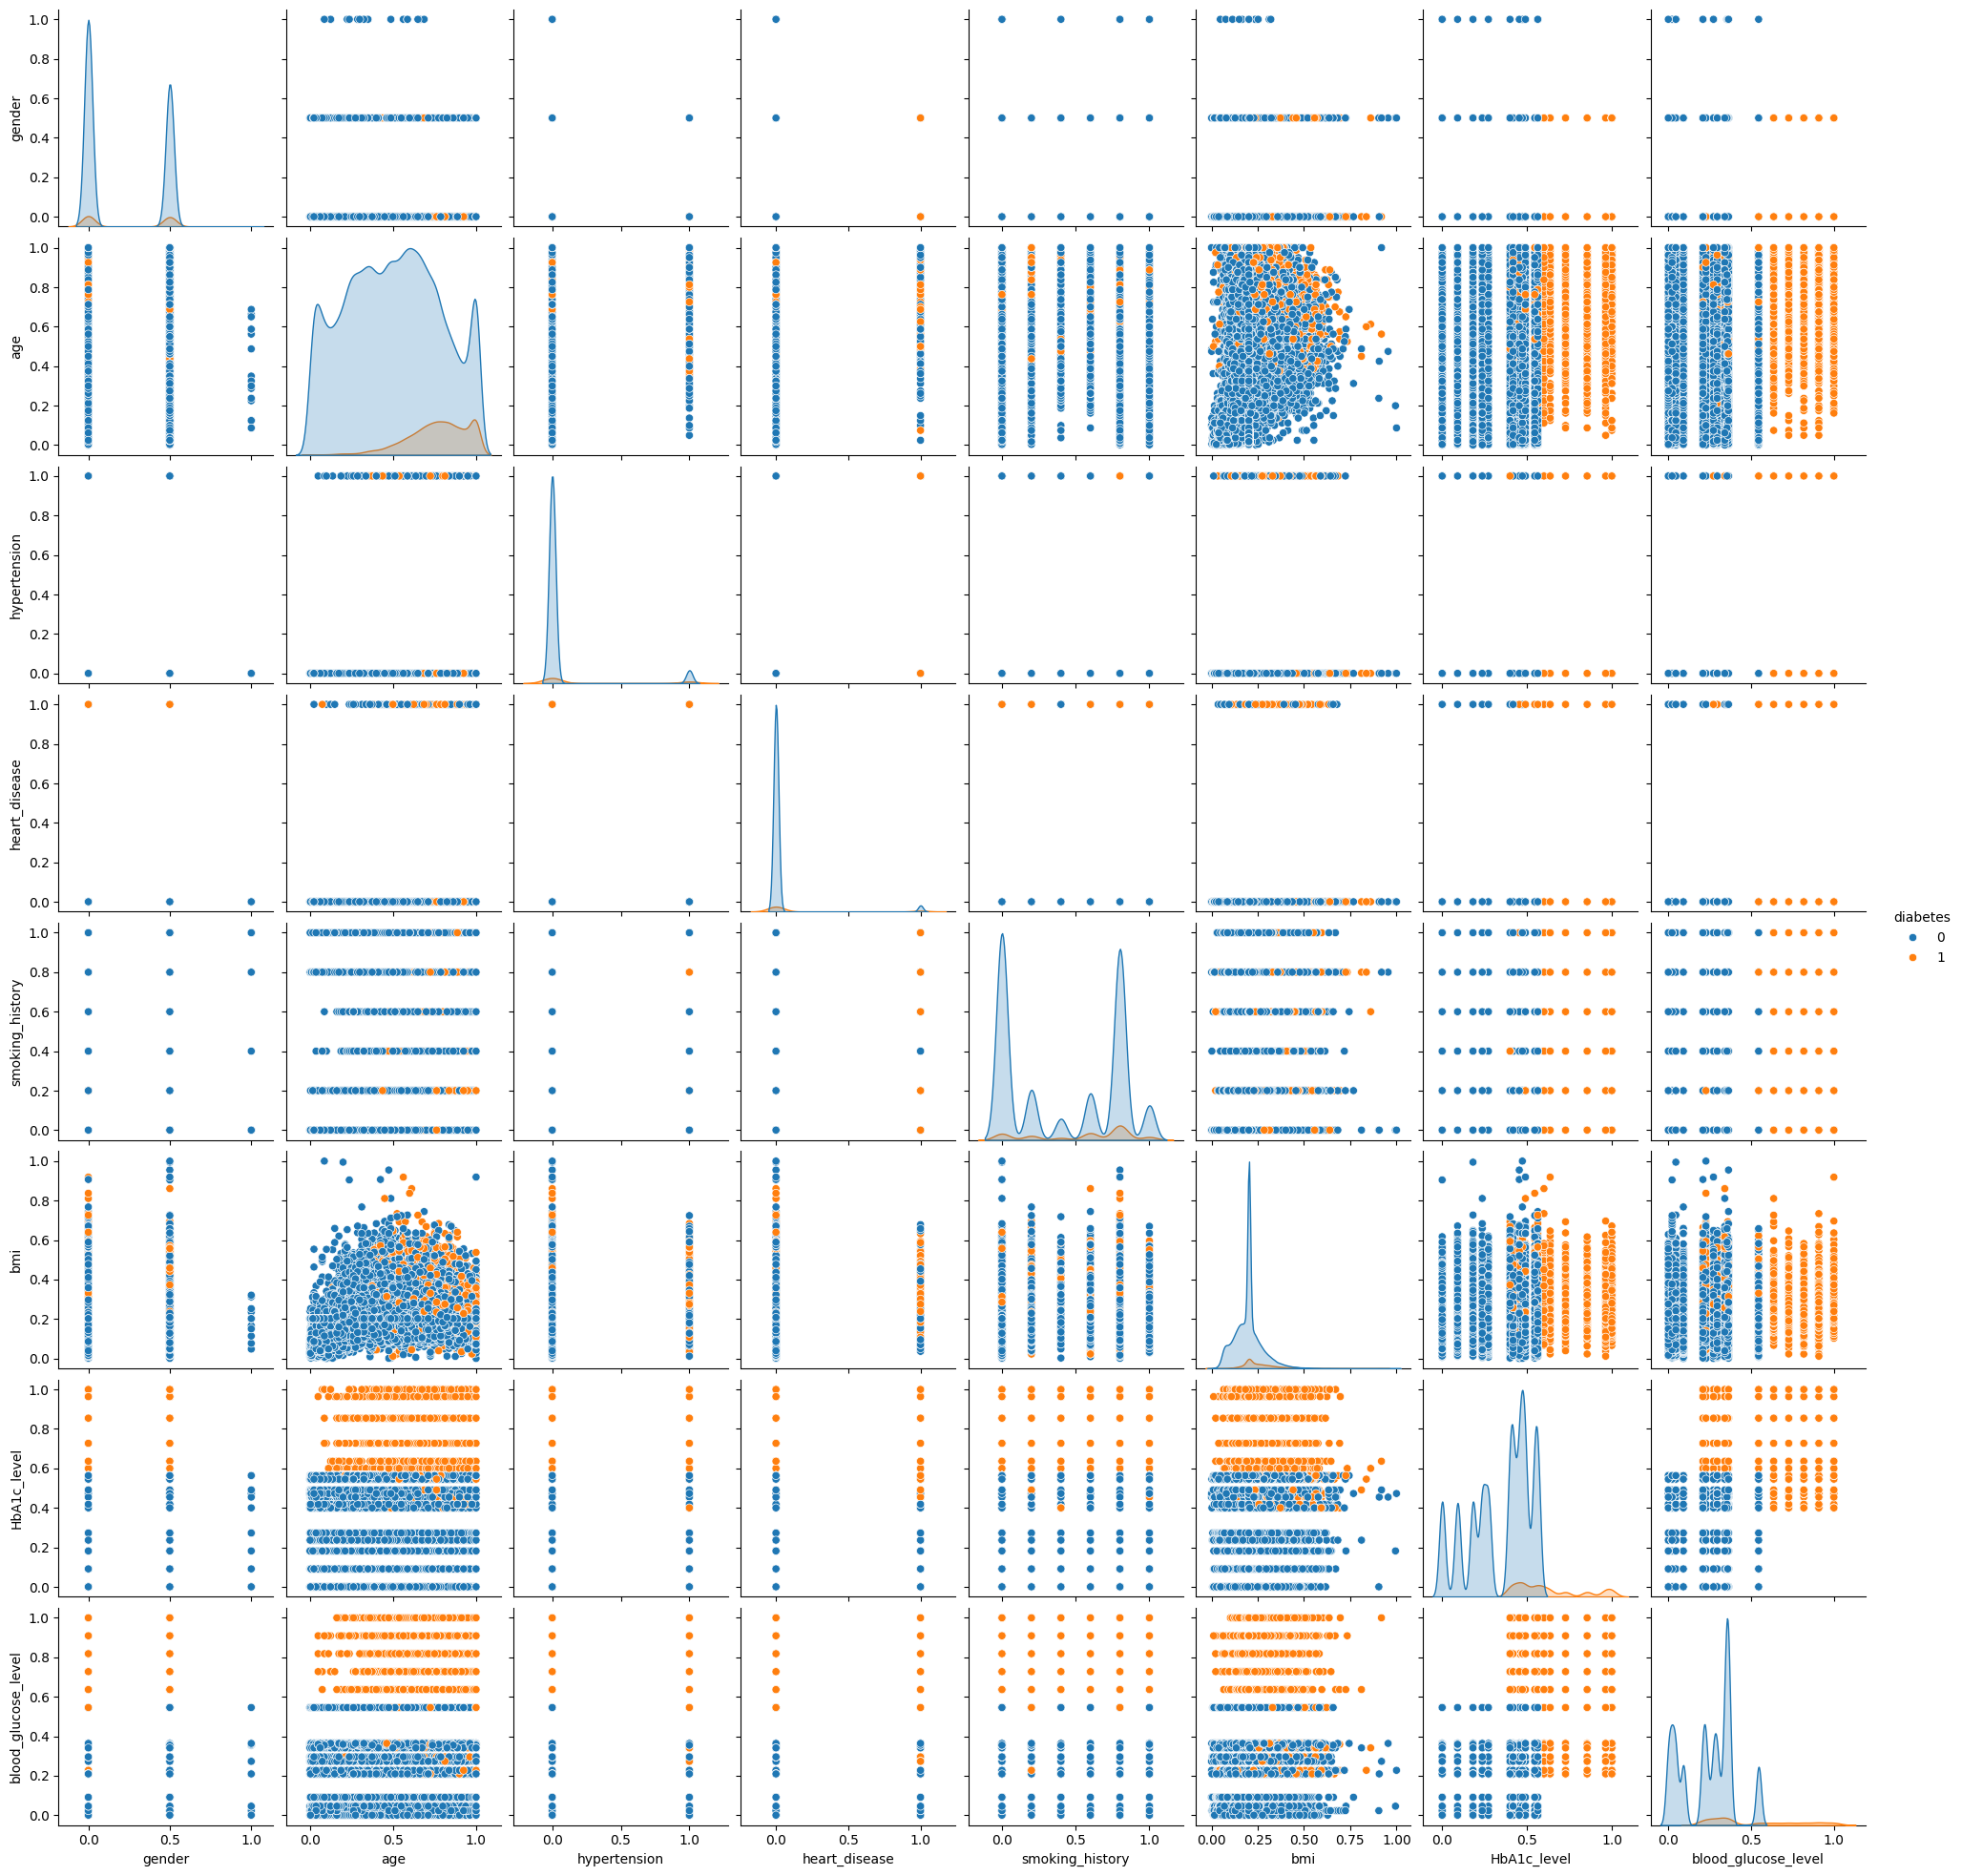

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

#columns_to_plot = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender', 'smoking_history']

# Create a pairplot
sns.pairplot(data, hue='diabetes')
plt.show()

In [40]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 37.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


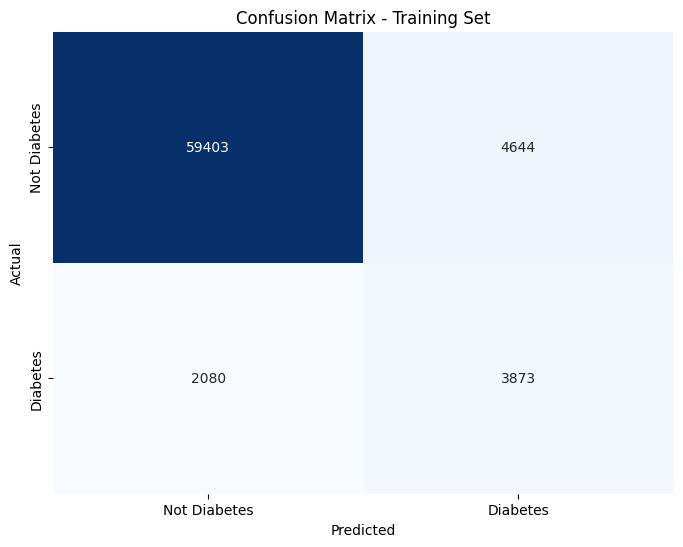

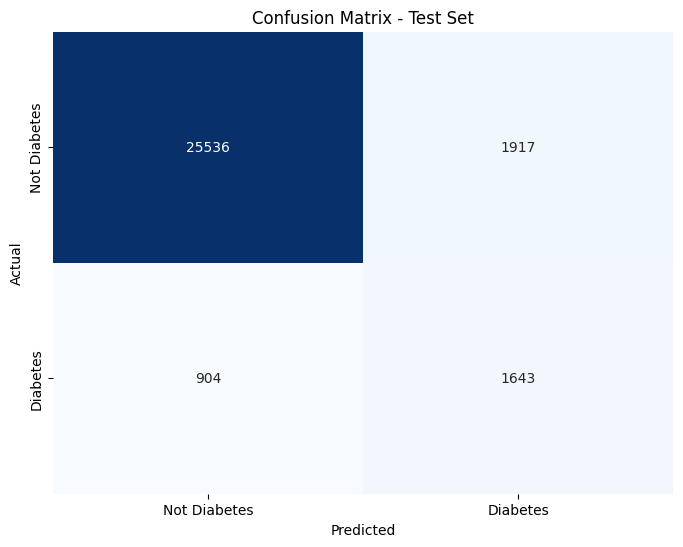

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

# Predictions on the training set
train_predictions = model.predict(X_train)

# Predictions on the test set
test_predictions = model.predict(X_test)

# Confusion matrix for training set
train_cm = confusion_matrix(y_train, train_predictions)

# Confusion matrix for test set
test_cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetes', 'Diabetes'], yticklabels=['Not Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Diabetes', 'Diabetes'], yticklabels=['Not Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()